# Update/change an existing target

You may want to change pre-defined **skysurvey** targets, either by changing the model function parameters (the `kwargs`) or even by changing the model itself. 

You can do that while calling `draw()`, `from_draw()` or simply using `update_model()` or `update_model_parameters()`. 

Let's see the differences.

> **tldr;** `kwargs` in `draw()` only affect this data draw, while changes calling `from_draw()`, `update_model()` or `update_model_parameters()` affect the instance's model.

***
## Changing model entry's parameters

This is the simplest and the most commun usage. 

You want to change the model's parameters. You can do that using `**kwargs` of `draw()` (`from_draw()`) method, with the format:
```python
{entry_name: dict}
```


For instance, let's change the **alpha** and **beta** parameters of the SNeIa model ; these are parameters of the **magabs** function (see, `skysurvey.target.snia.SNeIaMagnitude.tripp1998`):

In [9]:
import skysurvey

snia = skysurvey.SNeIa.from_draw(size=1_000, 
                                 magabs={"alpha":-0.15, "beta":3.2} # kwargs here
                                )
snia.data

,z,x1,c,t0,ra,dec,magabs,mwebv,magobs,x0,template
0,0.12335,0.005,-0.059337,56050.554688,295.345276,-45.356987,-19.578701,0.074459,19.297249,0.000303,salt2
1,0.12425,-0.515,0.185660,56089.160156,10.793458,-48.294235,-18.340822,0.014034,20.552164,0.000095,salt2
2,0.17995,0.130,-0.025264,56175.203125,330.346680,-55.670135,-19.534475,0.022090,20.237242,0.000128,salt2
3,0.15305,0.275,-0.075212,56125.285156,337.899323,-55.291012,-19.576645,0.020682,19.808245,0.000189,salt2
4,0.18125,-0.385,0.064151,56080.679688,185.410629,86.832001,-19.074341,0.293091,20.714678,0.000082,salt2
...,...,...,...,...,...,...,...,...,...,...,...
995,0.13895,-1.495,0.047259,56121.378906,318.926514,49.665226,-18.777458,1.906101,20.378557,0.000112,salt2
996,0.18115,0.065,0.230396,56017.242188,180.759109,-61.256058,-18.490904,2.337669,21.296787,0.000048,salt2
997,0.18155,-0.770,0.028307,56062.605469,26.737309,-17.553894,-19.163115,0.017458,20.629879,0.000089,salt2
998,0.08145,1.075,0.356473,56155.152344,96.943260,52.802578,-18.330139,0.132881,19.584503,0.000233,salt2


**Using `kwargs` in `from_draw()` does update the actual instance's model, unlike the kwargs option of `draw()`**

Consequently, the ``model`` itself is changed.

In [10]:
snia.model

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x2a1033640>},
 'c': {'func': <function SNeIaColor.color_rvs at 0x2a10329e0>},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1100abe40>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x2a10336d0>,
            'kwargs': {'x1': '@x1',
                       'c': '@c',
                       'mabs': -19.3,
                       'sigmaint': 0.1,
                       'alpha': -0.15,
                       'beta': 3.2}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x17b8f0dc0>,
           'kwargs': {},
           'as': ['ra', 'dec']},
 'mwebv': {'func': <function get_mwebv at 0x2a1032d40>

### how to permanently change a loaded instance's model parameters ?

To permanently change the model of an already loaded  instance, you need to use ``self.update_model_parameter()``.

In [11]:
snia.update_model_parameter(magabs={"alpha":-0.15, "beta":3.8} )
snia.model

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x2a1033640>},
 'c': {'func': <function SNeIaColor.color_rvs at 0x2a10329e0>},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1100abe40>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x2a10336d0>,
            'kwargs': {'x1': '@x1',
                       'c': '@c',
                       'mabs': -19.3,
                       'sigmaint': 0.1,
                       'alpha': -0.15,
                       'beta': 3.8}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x17b8f0dc0>,
           'kwargs': {},
           'as': ['ra', 'dec']},
 'mwebv': {'func': <function get_mwebv at 0x2a1032d40>

***
## Changing model entry's (`func` and `kwargs`)

You can also change the way a parameter is drawn, not just it's function parameters.

To do so, you need to update `func` and provide its new `kwargs` (if any). This means, updating the `model` for the entry.

To do that, you can use:
- the **model** option in `draw()`: this will update the model used to draw but will not affect the actual instance's model
- the **model** option in `from_draw()`: this changes the model while creating the instance, it is thus permanent 
- the `update_model()` method: this is permanent (it is what `from_draw()` uses).

The format is that of a model (see [modelDAG](https://modeldag.readthedocs.io/en/latest/)):
```python
{entry_name: {"func": a_function, ["kwargs": dict, "as": string_or_list]}}
```


For instance, say we want to change how the **c** parameter is drawn, we want to use a uniform distribution between -1 and +3: 

In [12]:
import numpy as np
new_model_for_c = {"c": {"func": np.random.uniform, "kwargs": {"low":-1, "high":+3}}}

In [13]:
snia = skysurvey.SNeIa.from_draw(size=1_000, 
                                 model=new_model_for_c
                                )


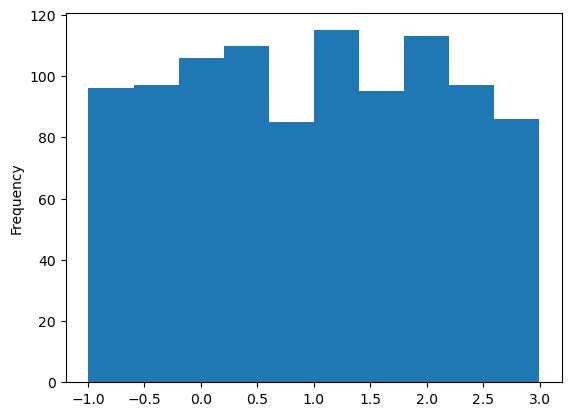

In [14]:
ax = snia.data["c"].plot.hist()

**here, the change is permanent, as you changed the model used to load the instance**

In [15]:
snia.model # check-out the c-entry

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x2a1033640>},
 'c': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1100abe40>,
       'kwargs': {'low': -1, 'high': 3}},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1100abe40>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x2a10336d0>,
            'kwargs': {'x1': '@x1',
                       'c': '@c',
                       'mabs': -19.3,
                       'sigmaint': 0.1,
                       'alpha': -0.15,
                       'beta': 3.8}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x17b8f0dc0>,
           'kwargs': {},
          

to change the model only for a `draw()` call

In [16]:
snia = skysurvey.SNeIa()
data_updated = snia.draw(size=1_000, model=new_model_for_c)
data_not_updated = snia.draw(size=1_000)

<Axes: ylabel='Frequency'>

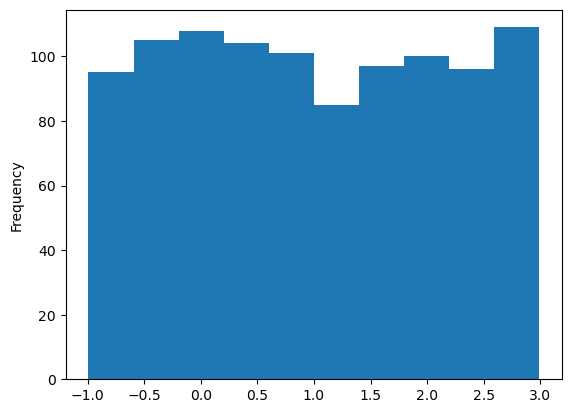

In [17]:
data_updated["c"].plot.hist()

<Axes: ylabel='Frequency'>

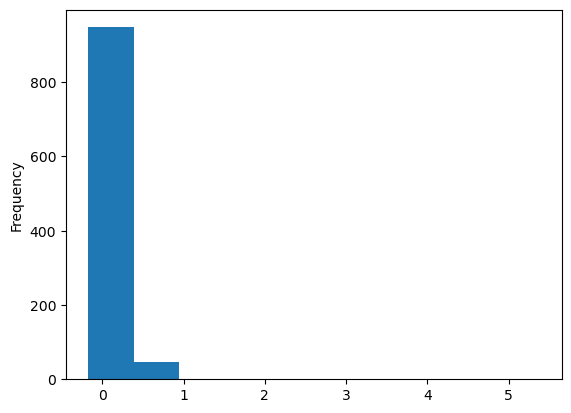

In [18]:
data_not_updated["c"].plot.hist()

### use `update_model()`

you can directly change (permanently) the model using update_model

In [19]:
flat_model = {"c": {"func": np.random.uniform, "kwargs": {"low":-0.1, "high":+1}},
              "x1": {"func": np.random.uniform, "kwargs": {"low":-3, "high":+3}}
             }

snia = skysurvey.SNeIa()
snia.update_model(**flat_model)
data = snia.draw(1_000)

In [20]:
data

,z,x1,c,t0,ra,dec,magabs,mwebv,magobs,x0
0,0.19865,1.176186,0.444875,56008.340695,222.896552,-1.865063,-17.675075,0.080541,22.335060,0.000018
1,0.09855,0.709318,0.437820,56096.020402,158.830749,-9.360366,-17.768205,0.038432,20.585214,0.000093
2,0.07125,-0.583655,-0.001735,56161.352299,40.159907,-24.963720,-19.342852,0.030212,18.266083,0.000784
3,0.06465,2.065721,0.245723,56099.688732,151.643297,62.479109,-18.483481,0.025641,18.904432,0.000435
4,0.18575,-2.142388,0.133901,56132.462905,160.724741,44.962650,-18.311956,0.024015,21.536072,0.000039
...,...,...,...,...,...,...,...,...,...,...
995,0.13945,0.925297,0.113981,56051.033345,101.707529,62.187247,-19.117665,0.152948,20.046828,0.000152
996,0.08255,0.951880,0.651901,56007.822847,334.024022,58.718666,-16.954604,1.691119,20.990792,0.000064
997,0.16525,2.239961,0.897326,56053.932034,191.704559,-51.507224,-16.329488,0.340121,23.238086,0.000008
998,0.15115,1.332900,0.508084,56145.351300,274.529018,36.913573,-17.509565,0.043677,21.845660,0.000029


### shall I update a model or create a new one ?

`model` option can **affect any entry**, you can even **add entry**, but any new entry will be appended at the end of the dist model. **So to create an internal dependency, you will need to create a new model from scratch.**


***
## How to insert a new entry to create an internal dependency


Say you want to randomly draw **beta** from a normal distribution and use this drawn parameter as input of **magabs**


**using update_model() will work** because `modeldag` orders the model entry prior to call `draw()`. Hence, beta will be inserted prior magabs the used `model` dict. However, do not forget to update the magabs kwargs to specify that beta must use the drawn beta.

In [24]:
random_beta_model = {"beta": {"func": np.random.normal, "kwargs": {"loc":3.5, "scale":0.1}}}

In [25]:
snia = skysurvey.SNeIa.from_draw(1_000, model=random_beta_model,
                                magabs={"beta":"@beta"}  # don't forget to update magabs
                                )

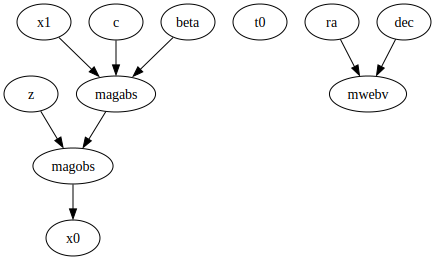

In [26]:
snia.model.visualize()

In [27]:
snia.data

,z,x1,c,t0,ra,dec,beta,magabs,mwebv,magobs,x0,template
0,0.18755,0.310,0.100449,56100.199219,91.745285,26.643330,3.502293,-19.082514,0.438025,20.788748,0.000077,salt2
1,0.12435,-0.080,0.106237,56125.371094,69.915680,21.941198,3.520313,-18.815409,0.282333,20.079466,0.000148,salt2
2,0.18605,-1.530,0.105854,56039.820312,239.642227,-24.382992,3.617054,-18.552702,0.372540,21.299213,0.000048,salt2
3,0.11905,-2.500,-0.031302,56158.765625,332.705963,-19.575117,3.390035,-19.192381,0.031475,19.600519,0.000229,salt2
4,0.12445,-1.280,-0.134878,56014.058594,124.406120,3.857391,3.389037,-19.595694,0.024401,19.301065,0.000302,salt2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.17325,1.370,0.315792,56052.222656,1.105094,14.998715,3.482856,-18.437946,0.067036,21.242723,0.000051,salt2
996,0.17845,1.805,0.105748,56099.261719,297.663971,-42.456161,3.445384,-19.097910,0.086934,20.653700,0.000087,salt2
997,0.18925,0.125,-0.025275,56126.058594,289.028870,-4.340125,3.559816,-19.504374,0.641207,20.388643,0.000111,salt2
998,0.16945,-0.550,0.111878,56142.671875,3.465228,54.717876,3.474002,-18.913858,0.306152,20.713709,0.000082,salt2
